Project title: 

In [919]:
! pip install -r requirements.txt
! pip install --upgrade pip
! pip install praw
! pip install nltk spacy

In [920]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
from scipy.stats import pearsonr
import seaborn as sns
from scipy.stats import spearmanr

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariiapyvovar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Engagement metrics analysis (r/Ukrainian Conflict)

In [921]:
df_ukr_conflict = pd.read_csv("data/r_ukr_conflict.csv")

In [922]:
df_ua = pd.read_csv("data/r_ua.csv")

In [923]:
# Aggregating engagement metrics by author
author_stats = df_ukr_conflict.groupby("author").agg(
    num_posts=("title", "count"),
    total_upvotes=("score", "sum"),
    total_comments=("num_comments", "sum")
).reset_index()

author_stats

,author,num_posts,total_upvotes,total_comments
0,16431879196842,1,0,23
1,2000dollar,2,226,59
2,A_Lazko,5,3670,213
3,AbleismIsSatan,11,2100,245
4,Acadia_Due,1,7508,306
...,...,...,...,...
217,wewewawa,1,30,5
218,whoamisri,1,404,19
219,wily_virus,1,306,65
220,yuri_2022,2,607,31


In [924]:
# Calculating an impact score for each author. A simple impact score can be the sum of total upvotes and total comments.
author_stats["impact_score"] = author_stats["total_upvotes"] + author_stats["total_comments"]

author_stats.head()

,author,num_posts,total_upvotes,total_comments,impact_score
0,16431879196842,1,0,23,23
1,2000dollar,2,226,59,285
2,A_Lazko,5,3670,213,3883
3,AbleismIsSatan,11,2100,245,2345
4,Acadia_Due,1,7508,306,7814


In [925]:
# Calculating an impact score for each author. A simple impact score can be the sum of total upvotes and total comments.
author_stats["impact_score"] = author_stats["total_upvotes"] + author_stats["total_comments"]

author_stats.head()

,author,num_posts,total_upvotes,total_comments,impact_score
0,16431879196842,1,0,23,23
1,2000dollar,2,226,59,285
2,A_Lazko,5,3670,213,3883
3,AbleismIsSatan,11,2100,245,2345
4,Acadia_Due,1,7508,306,7814


In [926]:
# Sorting authors by impact score in descending order to identify the top content creators.
key_content_creators = author_stats.sort_values(by="impact_score", ascending=False).reset_index(drop=True)

key_content_creators.head(10)

,author,num_posts,total_upvotes,total_comments,impact_score
0,Orcasystems99,96,52580,4809,57389
1,MaryADraper,116,52196,4843,57039
2,newsweek,42,38837,2910,41747
3,Independent_Lie_9982,143,32105,5790,37895
4,ua-stena,34,26104,1638,27742
5,Mil_in_ua,104,23395,1828,25223
6,rulepanic,63,22516,2273,24789
7,Barch3,34,17778,1485,19263
8,Necessary-Canary3367,16,16360,1381,17741
9,LIGA_net,77,15202,1876,17078


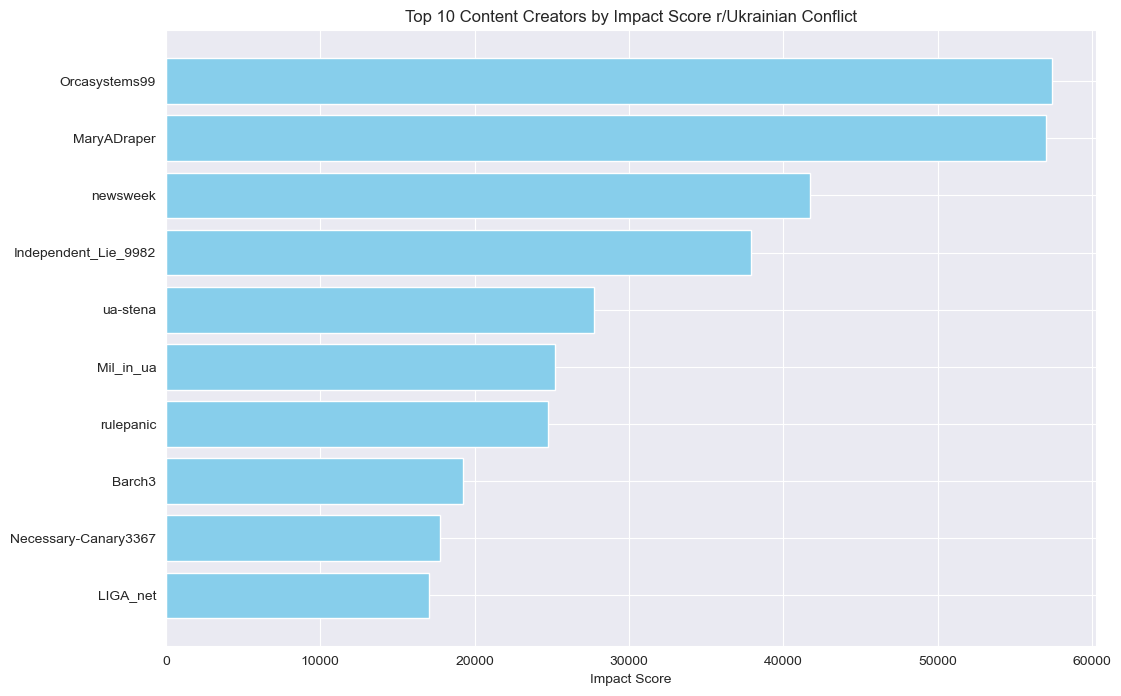

In [927]:
# Selecting the top 10 content creators
top_10_content_creators_ua_confl = key_content_creators.head(10)

# Plotting the impact score of the top 10 content creators
plt.figure(figsize=(12, 8))
plt.barh(top_10_content_creators_ua_confl["author"], top_10_content_creators_ua_confl["impact_score"], color="skyblue")
plt.xlabel("Impact Score")
plt.title("Top 10 Content Creators by Impact Score r/Ukrainian Conflict")
plt.gca().invert_yaxis()
plt.show()

In [928]:
# Ensuring 'created_utc' is in datetime format
df_ukr_conflict["created_utc"] = pd.to_datetime(df_ukr_conflict["created_utc"])

# Extracting the date part only
df_ukr_conflict["date"] = df_ukr_conflict["created_utc"].dt.date
df_ukr_conflict.head()

,id,title,score,num_comments,upvote_ratio,created_utc,author,url,date
0,1enu0os,"chechen commander admits russian losses, ukrai...",25,7,1.00,2024-08-09 07:55:35,KI_official,https://kyivindependent.com/chechen-commander-...,2024-08-09
1,1entf03,aftermath of the nighttime strike on the russi...,254,51,1.00,2024-08-09 07:13:25,Guudbaad,https://streamable.com/8bh9xu,2024-08-09
2,1ensol1,mexico rejects ukraine's request to arrest putin,19,11,0.83,2024-08-09 06:25:35,LIGA_net,https://news.liga.net/en/politics/news/mexico-...,2024-08-09
3,1ensmdl,s.t.a.l.k.e.r. game developers help purchase 1...,226,17,1.00,2024-08-09 06:21:38,MantasChan,https://www.ukrinform.net/rubric-society/38934...,2024-08-09
4,1enrudg,"russian army loses 1,030 more soldiers in ukra...",58,11,0.96,2024-08-09 05:32:48,MantasChan,https://www.ukrinform.net/rubric-ato/3893460-r...,2024-08-09


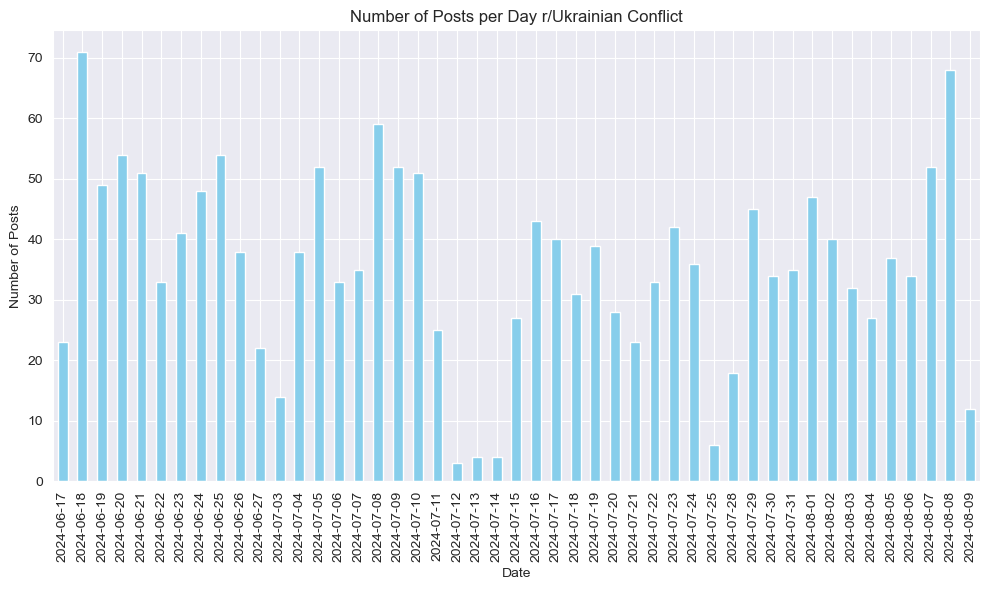

In [929]:
# Converting 'date' column to datetime
df_ukr_conflict["date"] = pd.to_datetime(df_ukr_conflict["date"])

# Grouping by 'date' and count number of posts
posts_per_day_ua_confl = df_ukr_conflict.groupby(df_ukr_conflict["date"].dt.date).size()

# Plotting
plt.figure(figsize=(10, 6))
posts_per_day_ua_confl.plot(kind="bar", color="skyblue")
plt.title("Number of Posts per Day r/Ukrainian Conflict")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

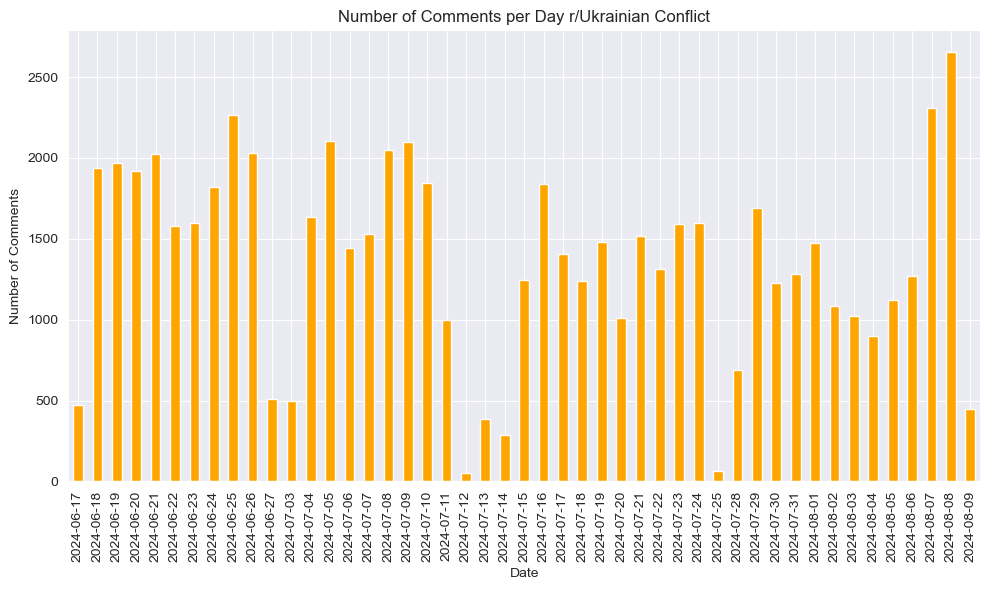

In [930]:
# Grouping by 'date' and sum the number of comments
comments_per_day_ua_confl = df_ukr_conflict.groupby(df_ukr_conflict["date"].dt.date)["num_comments"].sum()

# Plotting
plt.figure(figsize=(10, 6))
comments_per_day_ua_confl.plot(kind="bar", color="orange")
plt.title("Number of Comments per Day r/Ukrainian Conflict")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Calculating pearson correlation coefficient between number of posts and number of comments.

In [931]:
# Convert Series to DataFrames to merge on date
posts_per_day_df = posts_per_day_ua_confl.reset_index(name="posts")
comments_per_day_df = comments_per_day_ua_confl.reset_index(name="comments")

# Merge DataFrames on date
merged_df = pd.merge(posts_per_day_df, comments_per_day_df, left_on="date", right_on="date")

# Extract aligned series
posts_per_day_aligned = merged_df["posts"]
comments_per_day_aligned = merged_df["comments"]

In [932]:
# Calculate Pearson correlation coefficient
pearson_correlation = pearsonr(posts_per_day_aligned, comments_per_day_aligned, alternative="two-sided", method=None)

print(f"Pearson correlation coefficient: {corr_coefficient:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.21
P-value: 0.234


## Interpretation of results:
The correlation coefficient of 0.21 indicates a weak positive linear relationship between the number of posts per day and the number of comments per day. But on the other hand we can clearly see that the visual pattern appears to be similar. 
Same correlation we can observe in the subreddit r/Ukraine


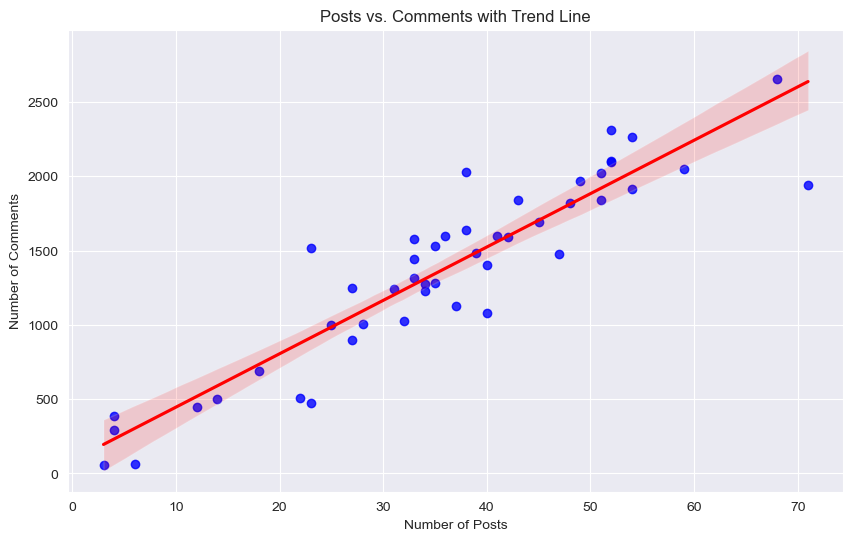

In [933]:
plt.figure(figsize=(10, 6))
sns.regplot(x=posts_per_day_aligned, y=comments_per_day_aligned, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Posts vs. Comments with Trend Line")
plt.xlabel("Number of Posts")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.show()

In [934]:
spearman_corr, spearman_p_value = spearmanr(posts_per_day_aligned, comments_per_day_aligned)

print(f"Spearman's correlation coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p_value:.3f}")

Spearman's correlation coefficient: 0.91
P-value: 0.000


## Interpretation of results: 
The weak positive Spearman correlation (0.91) indicates a very strong positive monotonic relationship between the number of comments and the number of posts. This means that as the number of posts increases, the number of comments tends to increase as well, and the relationship is quite strong.

## Engagement metrics analysis (r/Ukraine)

In [935]:
# Aggregate engagement metrics by author
author_stats = df_ua.groupby("author").agg(
    num_posts=("title", "count"),
    total_upvotes=("score", "sum"),
    total_comments=("num_comments", "sum")
).reset_index()

author_stats

,author,num_posts,total_upvotes,total_comments
0,-_Nyx_,1,22,6
1,00Qant5689,1,710,74
2,108CA,2,1014,71
3,21_vetal_01,11,3685,185
4,2FalseSteps,2,4954,337
...,...,...,...,...
355,whibbler,2,1175,104
356,wigglepizza,1,443,20
357,yo-jin,1,224,6
358,yorkiecd,7,7538,607


In [936]:
# Calculate an impact score for each author. A simple impact score can be the sum of total upvotes and total comments.
author_stats["impact_score"] = author_stats["total_upvotes"] + author_stats["total_comments"]

# Display the data with the impact score
author_stats.head()

,author,num_posts,total_upvotes,total_comments,impact_score
0,-_Nyx_,1,22,6,28
1,00Qant5689,1,710,74,784
2,108CA,2,1014,71,1085
3,21_vetal_01,11,3685,185,3870
4,2FalseSteps,2,4954,337,5291


In [937]:
# Sort authors by impact score in descending order to identify the top content creators.
key_content_creators = author_stats.sort_values(by="impact_score", ascending=False).reset_index(drop=True)

# Display the top content creators
key_content_creators.head(10)

,author,num_posts,total_upvotes,total_comments,impact_score
0,TotalSpaceNut,123,240051,8373,248424
1,UNITED24Media,125,125579,5895,131474
2,Mil_in_ua,154,118325,4514,122839
3,Igor0976,55,107660,4881,112541
4,KI_official,52,44044,1614,45658
5,Espressodimare,15,37364,1536,38900
6,MARTINELECA,18,21365,1445,22810
7,ibloodylovecider,17,21532,550,22082
8,vectorix108,5,20291,527,20818
9,AdSpecialist6598,20,17974,577,18551


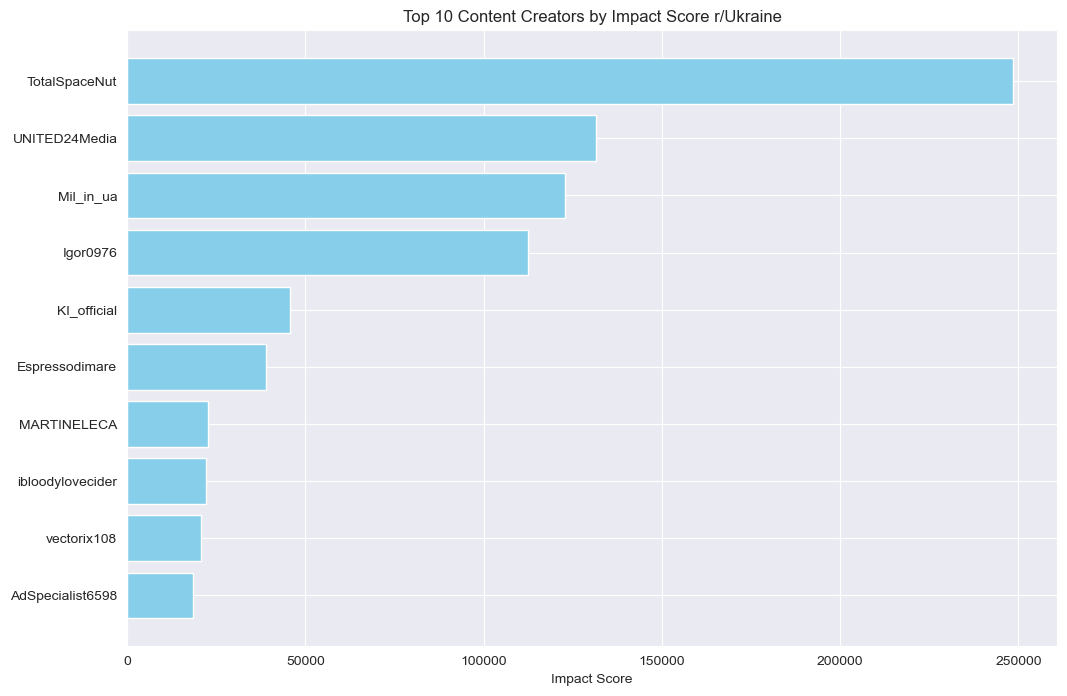

In [938]:
# Select the top 10 content creators
top_10_content_creators_ua = key_content_creators.head(10)

# Plotting the impact score of the top 10 content creators
plt.figure(figsize=(12, 8))
plt.barh(top_10_content_creators_ua["author"], top_10_content_creators_ua["impact_score"], color="skyblue")
plt.xlabel("Impact Score")
plt.title("Top 10 Content Creators by Impact Score r/Ukraine")
plt.gca().invert_yaxis()
plt.show()

In [939]:
# Ensuring 'created_utc' is in datetime format
df_ua["created_utc"] = pd.to_datetime(df_ua["created_utc"])

# Extracting the date part only
df_ua["date"] = df_ua["created_utc"].dt.date
df_ua.head()

,id,title,score,num_comments,upvote_ratio,created_utc,author,url,date
0,1enu3hy,russians are sending concrete bomb shelters to...,54,7,0.98,2024-08-09 08:00:48,TotalSpaceNut,https://i.redd.it/e9cnj6sqhlhd1.jpeg,2024-08-09
1,1entptu,current situation,132,5,0.99,2024-08-09 07:34:22,Andes_,https://v.redd.it/ctwuvjw3dlhd1,2024-08-09
2,1ent6tb,the column that was destroyed near rylsk in th...,822,114,0.99,2024-08-09 06:58:30,onesole,https://v.redd.it/h58ju9fs6lhd1,2024-08-09
3,1ens3ml,former white house security staffer dropping t...,287,5,0.99,2024-08-09 05:48:54,LilLebowskiAchiever,https://nitter.poast.org/Angry_Staffer/status/...,2024-08-09
4,1enr48u,wonderful! 16-year-old taisiia onofriichuk pe...,294,14,1.00,2024-08-09 04:50:24,REpassword,https://v.redd.it/5yop04yxjkhd1,2024-08-09


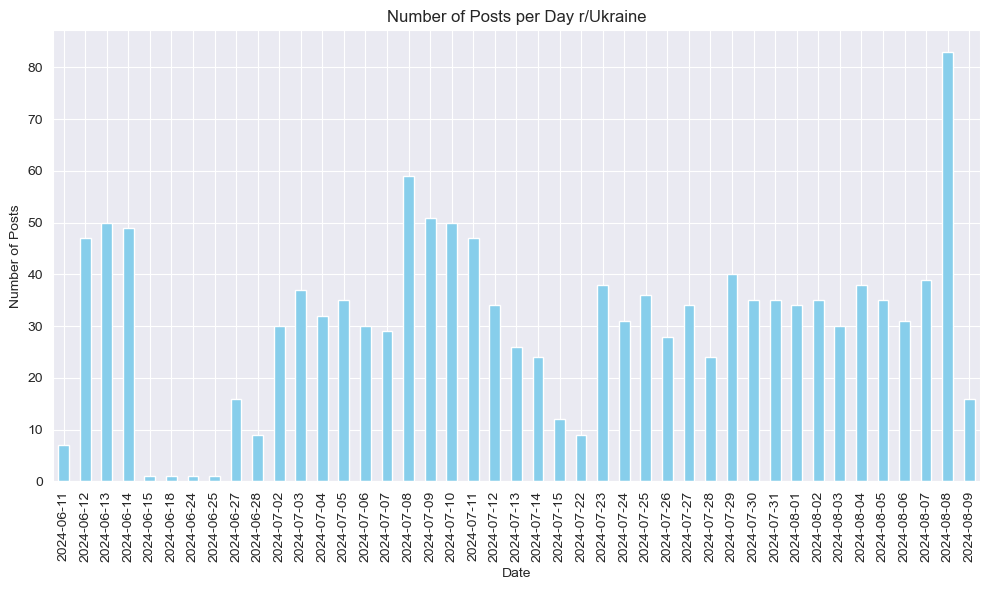

In [940]:
# Converting 'date' column to datetime
df_ua["date"] = pd.to_datetime(df_ua["date"])

# Grouping by 'date' and count number of posts
posts_per_day_ua = df_ua.groupby(df_ua["date"].dt.date).size()

# Plotting
plt.figure(figsize=(10, 6))
posts_per_day_ua.plot(kind="bar", color="skyblue")
plt.title("Number of Posts per Day r/Ukraine")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

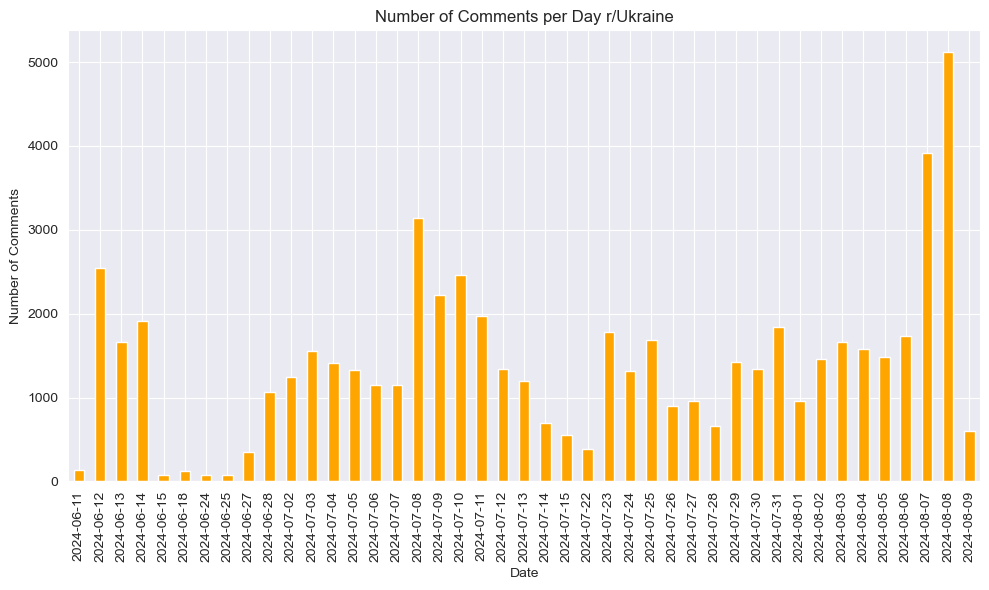

In [941]:
# Group by 'date' and sum the number of comments
comments_per_day_ua = df_ua.groupby(df_ua["date"].dt.date)["num_comments"].sum()

# Plotting
plt.figure(figsize=(10, 6))
comments_per_day_ua.plot(kind="bar", color="orange")
plt.title("Number of Comments per Day r/Ukraine")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 2. Sentiment analysis (r/Ukrainian Conflict)

In [942]:
analyzer = SentimentIntensityAnalyzer()

# Applying sentiment analysis to the 'title' column
df_ukr_conflict["compound"] = df_ukr_conflict["title"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

df_ukr_conflict.head()

,id,title,score,num_comments,upvote_ratio,created_utc,author,url,date,compound
0,1enu0os,"chechen commander admits russian losses, ukrai...",25,7,1.00,2024-08-09 07:55:35,KI_official,https://kyivindependent.com/chechen-commander-...,2024-08-09,-0.1280
1,1entf03,aftermath of the nighttime strike on the russi...,254,51,1.00,2024-08-09 07:13:25,Guudbaad,https://streamable.com/8bh9xu,2024-08-09,-0.1280
2,1ensol1,mexico rejects ukraine's request to arrest putin,19,11,0.83,2024-08-09 06:25:35,LIGA_net,https://news.liga.net/en/politics/news/mexico-...,2024-08-09,-0.6808
3,1ensmdl,s.t.a.l.k.e.r. game developers help purchase 1...,226,17,1.00,2024-08-09 06:21:38,MantasChan,https://www.ukrinform.net/rubric-society/38934...,2024-08-09,0.4019
4,1enrudg,"russian army loses 1,030 more soldiers in ukra...",58,11,0.96,2024-08-09 05:32:48,MantasChan,https://www.ukrinform.net/rubric-ato/3893460-r...,2024-08-09,-0.3182


In [943]:
def get_sentiment_category(compound_score):
    """ The function determines sentiment category based on compound score """
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Applying sentiment analysis to the 'title' column and categorize sentiment
df_ukr_conflict["sentiment"] = df_ukr_conflict["compound"].apply(get_sentiment_category)

df_ukr_conflict.head()

,id,title,score,num_comments,upvote_ratio,created_utc,author,url,date,compound,sentiment
0,1enu0os,"chechen commander admits russian losses, ukrai...",25,7,1.00,2024-08-09 07:55:35,KI_official,https://kyivindependent.com/chechen-commander-...,2024-08-09,-0.1280,negative
1,1entf03,aftermath of the nighttime strike on the russi...,254,51,1.00,2024-08-09 07:13:25,Guudbaad,https://streamable.com/8bh9xu,2024-08-09,-0.1280,negative
2,1ensol1,mexico rejects ukraine's request to arrest putin,19,11,0.83,2024-08-09 06:25:35,LIGA_net,https://news.liga.net/en/politics/news/mexico-...,2024-08-09,-0.6808,negative
3,1ensmdl,s.t.a.l.k.e.r. game developers help purchase 1...,226,17,1.00,2024-08-09 06:21:38,MantasChan,https://www.ukrinform.net/rubric-society/38934...,2024-08-09,0.4019,positive
4,1enrudg,"russian army loses 1,030 more soldiers in ukra...",58,11,0.96,2024-08-09 05:32:48,MantasChan,https://www.ukrinform.net/rubric-ato/3893460-r...,2024-08-09,-0.3182,negative


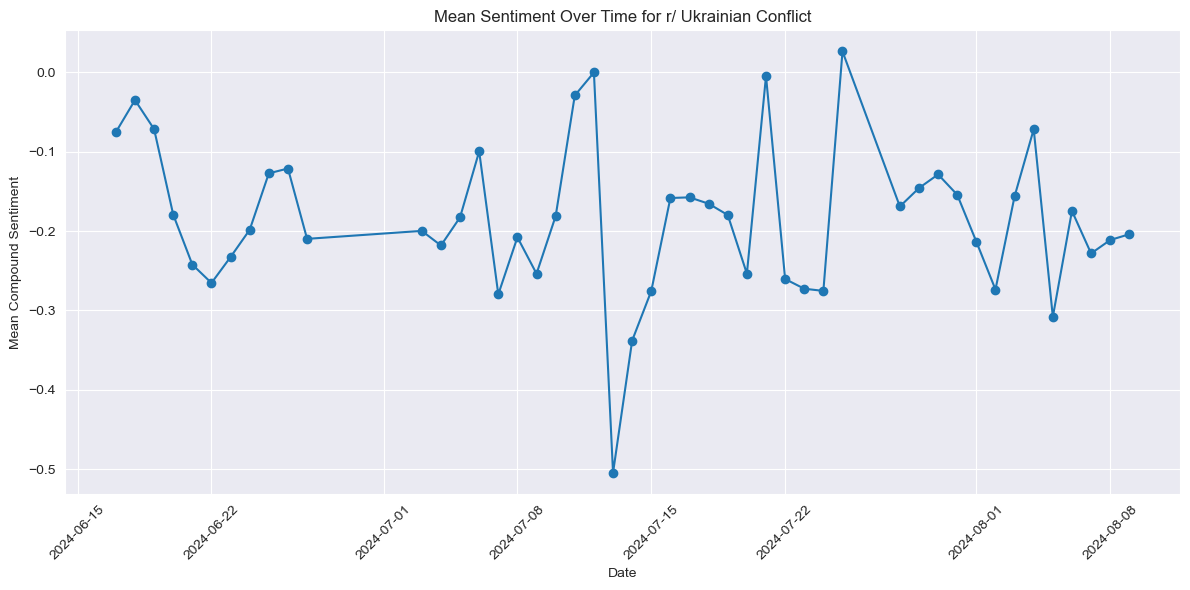

In [944]:
# Calculating the mean sentiment for each date
mean_sentiment_per_date = df_ukr_conflict.groupby("date")["compound"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(mean_sentiment_per_date["date"], mean_sentiment_per_date["compound"], marker="o")
plt.title("Mean Sentiment Over Time for r/ Ukrainian Conflict")
plt.xlabel("Date")
plt.ylabel("Mean Compound Sentiment")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sentiment analysis (r/Ukraine)

In [945]:
df_ua["compound"] = df_ua["title"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

def get_sentiment_category(compound_score):
    """ The function determines sentiment category based on compound score """
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Applying sentiment analysis to the 'title' column and categorize sentiment
df_ua["sentiment"] = df_ua["compound"].apply(get_sentiment_category)


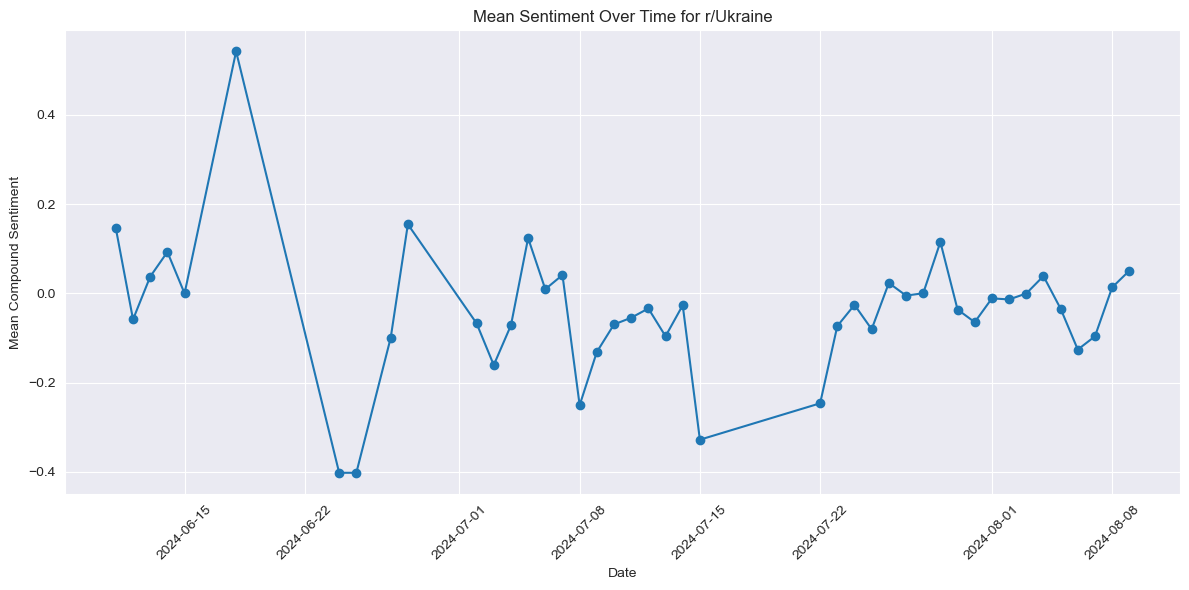

In [946]:
# Calculating the mean sentiment for each date
mean_sentiment_per_date = df_ua.groupby("date")["compound"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(mean_sentiment_per_date["date"], mean_sentiment_per_date["compound"], marker="o")
plt.title("Mean Sentiment Over Time for r/Ukraine")
plt.xlabel("Date")
plt.ylabel("Mean Compound Sentiment")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Comparing sentiment analysis of two subreddits

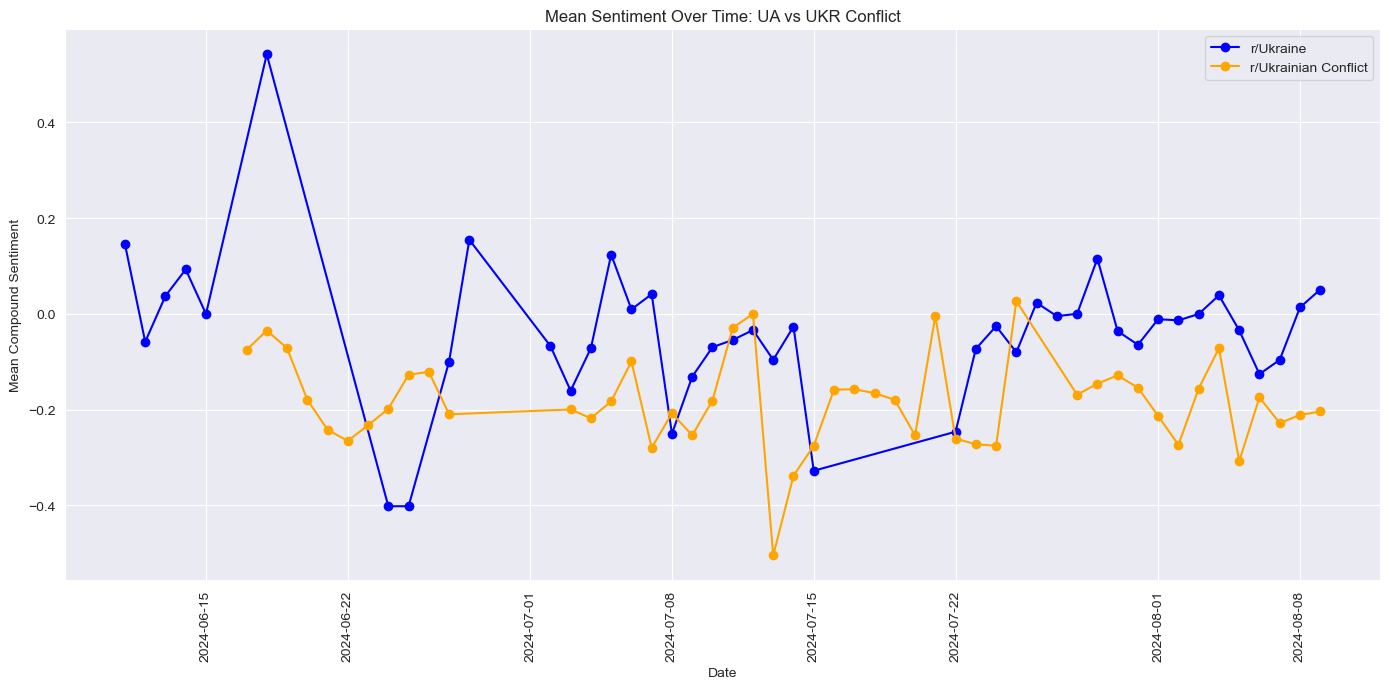

In [947]:
# Grouping by date and calculate mean compound sentiment score for df_ua
mean_sentiment_per_date_ua = df_ua.groupby("date")["compound"].mean().reset_index()

# Grouping by date and calculate mean compound sentiment score for df_ukr_conflict
mean_sentiment_per_date_ukr_conflict = df_ukr_conflict.groupby("date")["compound"].mean().reset_index()

plt.figure(figsize=(14, 7))

# Plotting for df_ua
plt.plot(mean_sentiment_per_date_ua["date"], mean_sentiment_per_date_ua["compound"], marker="o", label="r/Ukraine", color="blue")

# Plotting for df_ukr_conflict
plt.plot(mean_sentiment_per_date_ukr_conflict["date"], mean_sentiment_per_date_ukr_conflict["compound"], marker="o", label="r/Ukrainian Conflict", color="orange")

plt.title("Mean Sentiment Over Time: UA vs UKR Conflict")
plt.xlabel("Date")
plt.ylabel("Mean Compound Sentiment")
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Next I am calculating pearson correlation coefficient between two dataframes.

In [948]:
# Ensuring both DataFrames are sorted by date
df_ua = df_ua.sort_values(by="date")
df_ukr_conflict = df_ukr_conflict.sort_values(by="date")

# Grouping by date and calculate the mean compound sentiment score for both subreddits
mean_sentiment_per_date_ua = df_ua.groupby("date")["compound"].mean().reset_index()
mean_sentiment_per_date_ukr_conflict = df_ukr_conflict.groupby("date")["compound"].mean().reset_index()

# Merging the two DataFrames on the 'date' column to align the sentiment scores by date
merged_sentiments = pd.merge(mean_sentiment_per_date_ua, mean_sentiment_per_date_ukr_conflict, on="date", suffixes=("_ua", "_ukr_conflict"))

In [949]:
# Calculate Pearson correlation
correlation = merged_sentiments["compound_ua"].corr(merged_sentiments["compound_ukr_conflict"])

print(f"Pearson correlation coefficient between sentiment scores: {correlation:.2f}")

Pearson correlation coefficient between sentiment scores: 0.25


## Interpretation of results:
The coefficient suggests that correlation between two subreddits is  weak as it is closer to zero.

This might suggest that major events do not impact online sentiment similarly across different subreddits. While there might be some alignment, the sentiment patterns are generally independent, indicating that each subreddit reacts differently to events. This weak correlation could reflect the varying interests, focuses, and sensitivities of each community. One subreddit may be more reactive to certain types of news or events, while the other might not find those events as relevant or impactful.

My initial theory that sentiment should become uniformly more positive or negative in response to real-world events seems less applicable here. Instead, the impact of events on sentiment appears to depend heavily on each community’s unique focus, interests, and emotional investment. The differing reactions, where sentiment spikes in one subreddit but remains neutral in another, suggest that each community processes or prioritizes information in its own way.

## Sentiment Dynamics in Geopolitical and Conflict Discourse

In [950]:
df_geopolit = pd.read_csv("data/r_geopolit.csv")
df_geopolit

,id,title,score,num_comments,upvote_ratio,created_utc,author,url
0,1evyhs2,the pentagon is planning a drone ‘hellscape’ t...,102,45,0.95,2024-08-19 10:36:37,wiredmagazine,https://www.reddit.com/r/geopolitics/comments/...
1,1evnutv,life sentence: 25 years of putin,61,5,0.85,2024-08-18 23:58:52,CEPAORG,https://cepa.org/article/life-sentence-25-year...
2,1evlh7h,belarussian army near ukraine's border. what w...,110,62,0.89,2024-08-18 22:10:10,Its_average_wdym,https://www.reddit.com/r/geopolitics/comments/...
3,1evgbm7,“we underestimated the courage of the ukrainia...,346,50,0.87,2024-08-18 18:33:12,ua-stena,https://ua-stena.info/en/we-underestimated-the...
4,1evciu5,nine ukrainians on trial in russia face life s...,45,6,0.75,2024-08-18 15:52:29,Netlar2686,https://united24media.com/latest-news/nine-ukr...
...,...,...,...,...,...,...,...,...
668,1d6b1a6,do you trust numbers in geopolitics?,12,21,0.65,2024-06-02 11:16:25,Gerakison,https://www.reddit.com/r/geopolitics/comments/...
669,1d69se1,nato/otan in north africa,0,13,0.42,2024-06-02 09:49:55,Away_Independence_71,https://www.reddit.com/r/geopolitics/comments/...
670,1d5v3ee,biden outlines israeli proposal for ceasefire ...,42,45,0.79,2024-06-01 19:44:26,Acceptable_Fail2015,https://topnews.co.ke/biden-outlines-israeli-p...
671,1d5tij5,the failing anc is rejected by over half of so...,384,48,0.92,2024-06-01 18:31:57,taike0886,https://www.economist.com/middle-east-and-afri...


In [951]:
# Ensuring 'created_utc' is in datetime format
df_geopolit["created_utc"] = pd.to_datetime(df_geopolit["created_utc"])

# Extracting the date part only
df_geopolit["date"] = df_geopolit["created_utc"].dt.date

df_geopolit["compound"] = df_geopolit["title"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

# Function to determine sentiment category based on compound score
def get_sentiment_category(compound_score):
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis to the 'title' column and categorize sentiment
df_geopolit["sentiment"] = df_geopolit["compound"].apply(get_sentiment_category)

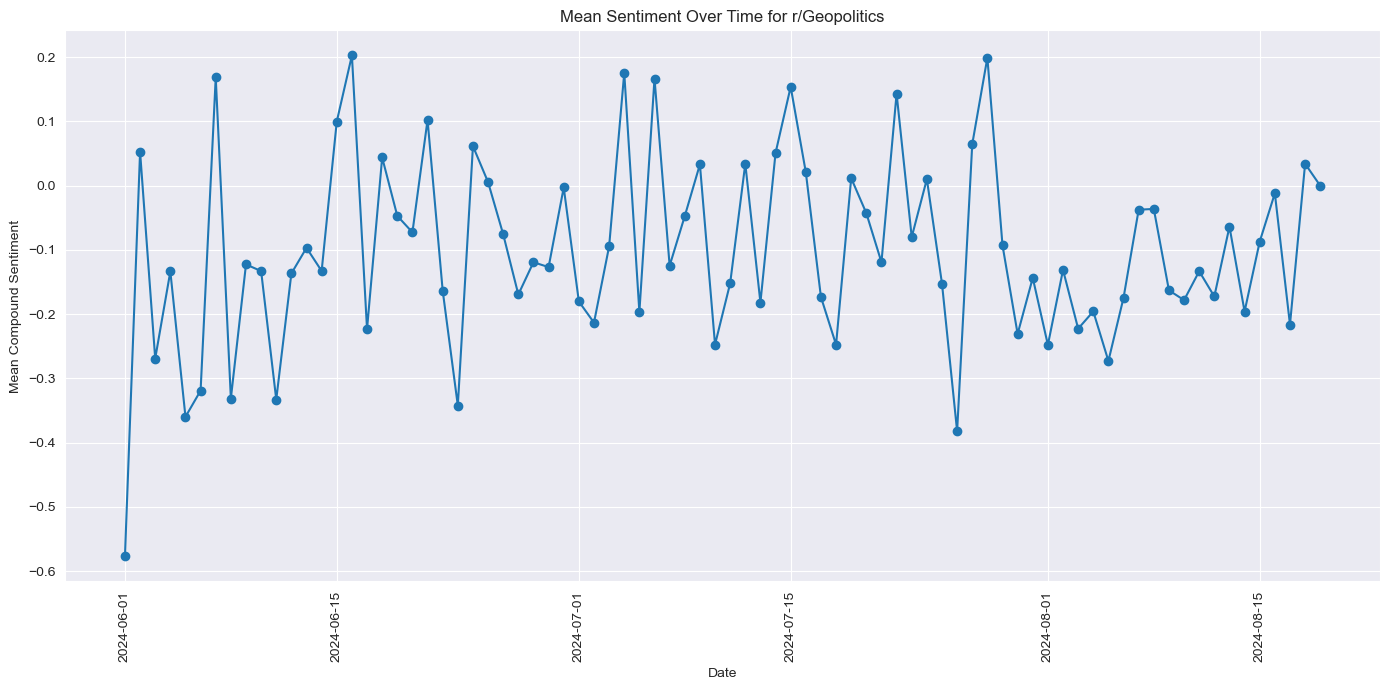

In [952]:
mean_sentiment_per_date = df_geopolit.groupby("date")["compound"].mean().reset_index()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(mean_sentiment_per_date["date"], mean_sentiment_per_date["compound"], marker="o")
plt.title("Mean Sentiment Over Time for r/Geopolitics")
plt.xlabel("Date")
plt.ylabel("Mean Compound Sentiment")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

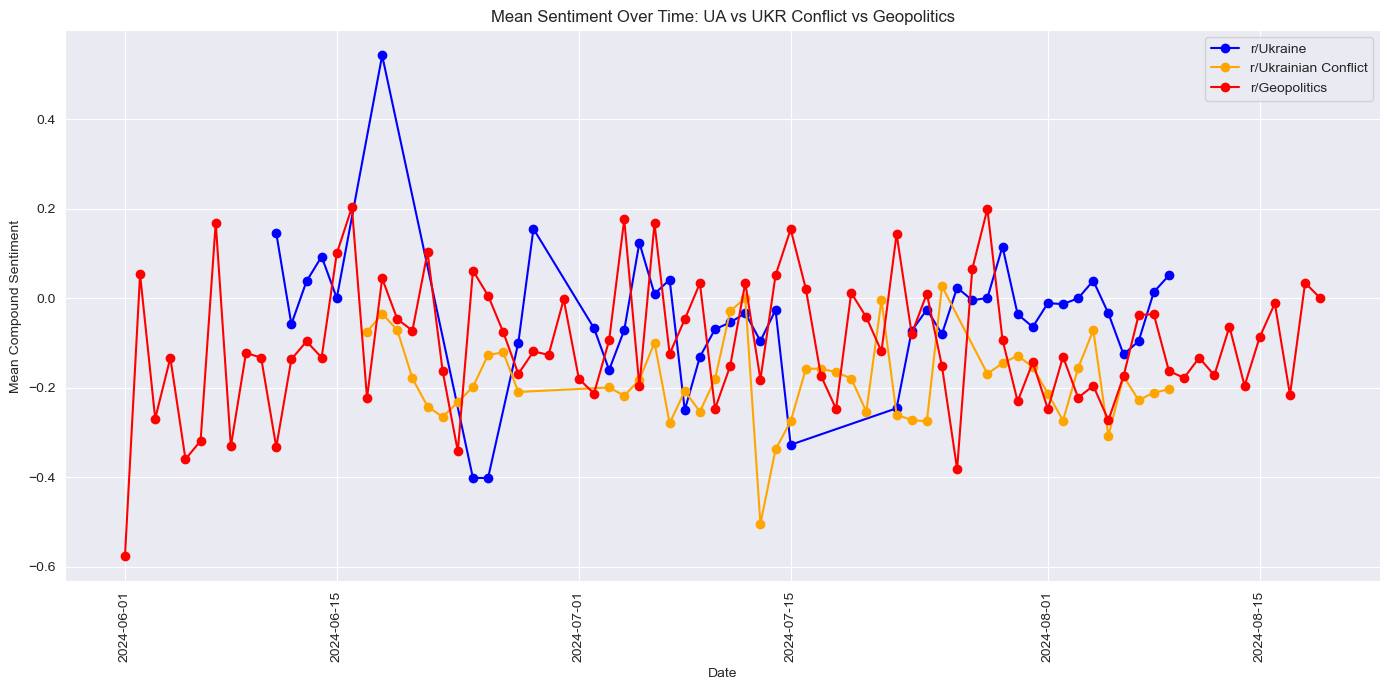

In [953]:
# Grouping by date and calculate mean compound sentiment score for df_ua
mean_sentiment_per_date_ua = df_ua.groupby("date")["compound"].mean().reset_index()

# Grouping by date and calculate mean compound sentiment score for df_ukr_conflict
mean_sentiment_per_date_ukr_conflict = df_ukr_conflict.groupby("date")["compound"].mean().reset_index()

# Grouping by date and calculate mean compound sentiment score for df_geopolitics
mean_sentiment_per_date_geopolitics = df_geopolit.groupby("date")["compound"].mean().reset_index()

plt.figure(figsize=(14, 7))

# Plotting for df_ua
plt.plot(mean_sentiment_per_date_ua["date"], mean_sentiment_per_date_ua["compound"], marker="o", label="r/Ukraine", color="blue")

# Plotting for df_ukr_conflict
plt.plot(mean_sentiment_per_date_ukr_conflict["date"], mean_sentiment_per_date_ukr_conflict["compound"], marker="o", label="r/Ukrainian Conflict", color="orange")

# Plotting for df_geopolitics
plt.plot(mean_sentiment_per_date_geopolitics["date"], mean_sentiment_per_date_geopolitics["compound"], marker="o", label="r/Geopolitics", color="red")

plt.title("Mean Sentiment Over Time: UA vs UKR Conflict vs Geopolitics")
plt.xlabel("Date")
plt.ylabel("Mean Compound Sentiment")
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

## Results interpretation:

We can see that subreddit "r/geopolitics" is unrelated to ukrainian subreddits. As a subreddit focused on global politics, "r/geopolitics" likely covers a wide range of topics beyond just the Ukrainian conflict. Discussions in this subreddit might be more generalized, dealing with broader geopolitical trends, different regions, and various global issues. These subreddits are more focused on specific, often emotionally charged events directly related to Ukraine. The discussions are likely more concentrated on the conflict, humanitarian issues, and the daily realities of the war.

## Pearson correlation between comments and sentiment scores (r/Ukrainian Conflict)

In [954]:
# Assuming 'comments' and 'sentiment' are columns in your DataFrame
correlation_comments_sentiment, p_value_comments_sentiment = pearsonr(df_ukr_conflict['num_comments'], df_ukr_conflict['compound'])

print(f"Pearson's correlation coefficient (Comments vs Sentiment): {correlation_comments_sentiment:.2f}")
print(f"P-value: {p_value_comments_sentiment:.3f}")

Pearson's correlation coefficient (Comments vs Sentiment): -0.02
P-value: 0.343


## Pearson correlation between comments and sentiment scores (r/Ukraine)

In [955]:
# Assuming 'comments' and 'sentiment' are columns in your DataFrame
correlation_comments_sentiment, p_value_comments_sentiment = pearsonr(df_ua['num_comments'], df_ua['compound'])

print(f"Pearson's correlation coefficient (Comments vs Sentiment): {correlation_comments_sentiment:.2f}")
print(f"P-value: {p_value_comments_sentiment:.3f}")

Pearson's correlation coefficient (Comments vs Sentiment): -0.09
P-value: 0.001


## Result interpretation:

For subreddit r/Ukrainian Conflict:
A correlation coefficient of -0.02 suggests a very weak negative linear relationship between the number of comments and sentiment. This indicates that, in this subreddit, there is almost no relationship between how many comments a post receives and the sentiment score of that post. The sentiment score does not seem to change significantly with the number of comments.
The p-value of 0.343 is greater than the commonly used significance level of 0.05. This means that the correlation observed is not statistically significant. There is no strong evidence to suggest that the number of comments is meaningfully related to the sentiment score in this subreddit. In other words, any observed correlation could be due to random chance.

For subreddit r/Ukraine:

A correlation coefficient of -0.09 also suggests a very weak negative linear relationship between the number of comments and sentiment. This indicates that, in this subreddit, there is almost no relationship between the number of comments and the sentiment of the posts, similar to Subreddit 1. The sentiment score appears to be nearly independent of the number of comments.

The p-value of 0.001 is less than the significance level of 0.05. This indicates that the observed correlation is statistically significant, meaning there is some evidence to suggest that there is a slight relationship between the number of comments and sentiment in this subreddit. However, the strength of the relationship is still very weak, as indicated by the low correlation coefficient.

## Sentiment analysis and Key content creators (r/Ukrainian Conflict)

In [956]:
# Get the list of top 10 content creators' usernames
top_10_authors_ua_confl = top_10_content_creators_ua_confl["author"].tolist()

# Filter the original DataFrame to include only posts from the top 10 creators
top_creators_posts_ua_confl = df_ukr_conflict[df_ukr_conflict["author"].isin(top_10_authors_ua_confl)]

In [957]:
# Group by author and calculate the mean compound sentiment score
creator_sentiment = top_creators_posts_ua_confl.groupby("author")["compound"].mean().reset_index()

# Determine the overall sentiment category (positive, negative, neutral) based on the compound score
creator_sentiment["sentiment"] = creator_sentiment["compound"].apply(get_sentiment_category)

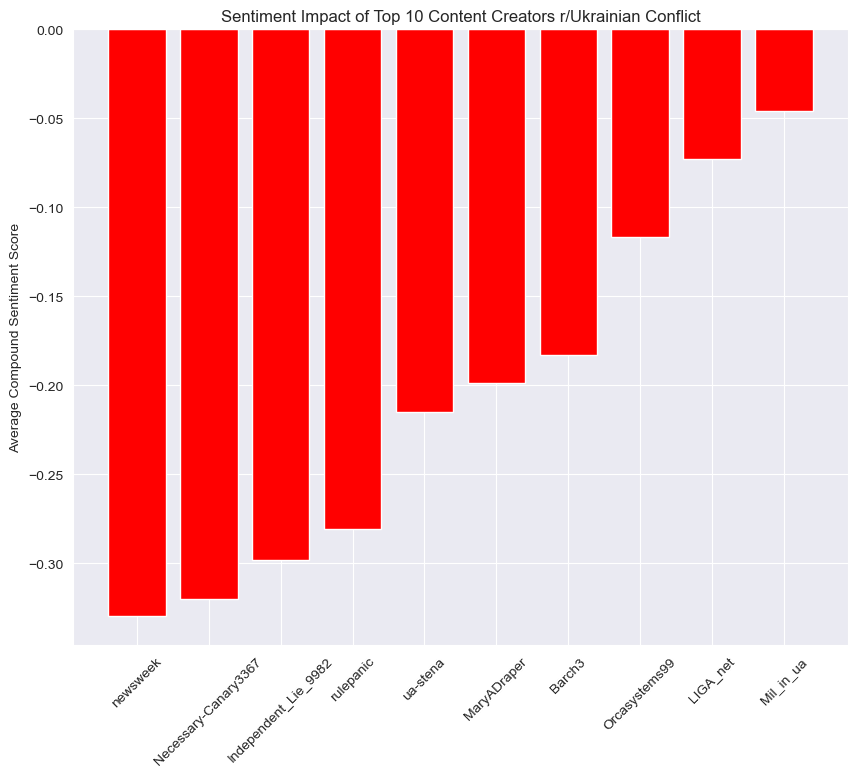

In [958]:
# Sort by sentiment score for better visualization
creator_sentiment = creator_sentiment.sort_values(by="compound")

# Assign colors: green for positive sentiment, red for negative
colors = ["green" if score > 0 else "red" for score in creator_sentiment["compound"]]

# Plotting the sentiment of the top 10 content creators
plt.figure(figsize=(10, 8))
plt.bar(creator_sentiment["author"], creator_sentiment["compound"], color=colors)
plt.ylabel("Average Compound Sentiment Score")
plt.title("Sentiment Impact of Top 10 Content Creators r/Ukrainian Conflict")
plt.axhline(y=0, color='black', linewidth=0.5)  # Adding a horizontal line at 0 for reference
plt.xticks(rotation=45)
plt.show()

## Sentiment analysis and Key content creators (r/Ukraine)

In [959]:
# Get the list of top 10 content creators' usernames
top_10_authors_ua = top_10_content_creators_ua["author"].tolist()

# Filter the original DataFrame to include only posts from the top 10 creators
top_creators_posts_ua= df_ua[df_ua["author"].isin(top_10_authors_ua)]

In [960]:
# Group by author and calculate the mean compound sentiment score
creator_sentiment = top_creators_posts_ua.groupby("author")["compound"].mean().reset_index()

# Determine the overall sentiment category (positive, negative, neutral) based on the compound score
creator_sentiment["sentiment"] = creator_sentiment["compound"].apply(get_sentiment_category)

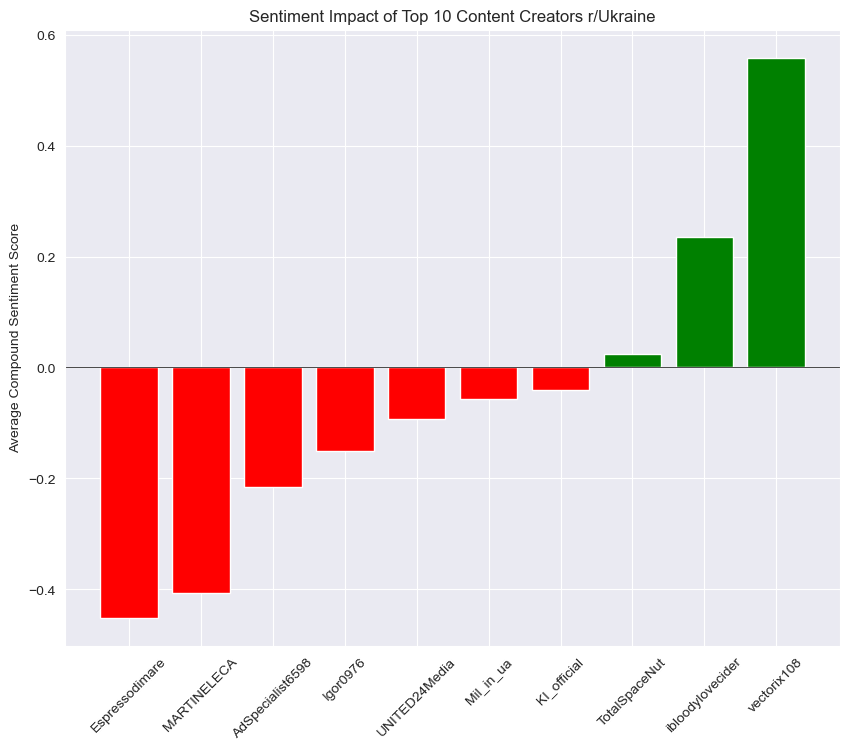

In [961]:
# Sort by sentiment score for better visualization
creator_sentiment = creator_sentiment.sort_values(by="compound")

# Assign colors: green for positive sentiment, red for negative
colors = ["green" if score > 0 else "red" for score in creator_sentiment["compound"]]

# Plotting the sentiment of the top 10 content creators
plt.figure(figsize=(10, 8))
plt.bar(creator_sentiment["author"], creator_sentiment["compound"], color=colors)
plt.ylabel("Average Compound Sentiment Score")
plt.title("Sentiment Impact of Top 10 Content Creators r/Ukraine")
plt.axhline(y=0, color='black', linewidth=0.5)  # Adding a horizontal line at 0 for reference
plt.xticks(rotation=45)
plt.show()

## Results interpretation

In the subreddit r/Ukrainian Conflict, the top 10 content creators contribute exclusively to negative sentiment. In contrast, in the subreddit r/Ukraine, the sentiment among the top 10 creators is more mixed: 3 creators generate content with positive sentiment, while 7 produce content with negative sentiment.
r/Ukrainian Conflict is likely more focused on the harsh realities and negative aspects of the ongoing conflict. The name itself suggests a focus on the conflict's more violent and disruptive elements, which naturally leads to a predominance of negative sentiment. This focus might attract content creators who are more inclined to discuss or highlight the negative impacts, contributing to an echo chamber of negative sentiment.
THere might be a potential echo chamber effect, where negative views are continuously reinforced. This could limit the diversity of perspectives within the subreddit and potentially discourage positive or neutral discussions.


r/Ukraine, while also discussing the conflict, might have a broader focus, including discussions on resilience, hope, and positive developments. This broader scope allows for a more balanced sentiment, where some creators emphasize positive outcomes or hopeful narratives, while others focus on the negative. The community is open to discussing both positive and negative aspects of the situation. This could lead to a more comprehensive understanding of the conflict, as it allows for the expression of hope and resilience alongside criticism and concern.

## 3. Keyword-Driven Sentiment Analysis

In [962]:
# Tokenizing the 'title' column for df_ua
df_ua["title_tokens"] = df_ua["title"].apply(word_tokenize)

# Tokenizing the 'title' column for df_ukr_conflict
df_ukr_conflict["title_tokens"] = df_ukr_conflict["title"].apply(word_tokenize)

In [963]:
df_ua[["title", "title_tokens"]].head()

,title,title_tokens
1305,switchblade long-range loitering munition dest...,"[switchblade, long-range, loitering, munition,..."
1304,ukraine's air force may keep f-16 warplanes ab...,"[ukraine, 's, air, force, may, keep, f-16, war..."
1303,ukraine to receive 100 additional patriot miss...,"[ukraine, to, receive, 100, additional, patrio..."
1302,argentina & ukraine: the plan designed by the ...,"[argentina, &, ukraine, :, the, plan, designed..."
1301,why are ukrainian banks so profitable during war?,"[why, are, ukrainian, banks, so, profitable, d..."


In [964]:
df_ukr_conflict[["title", "title_tokens"]].head()

,title,title_tokens
1682,ukraine hits 15 russian air defense systems in...,"[ukraine, hits, 15, russian, air, defense, sys..."
1660,china should pay for propping russia's ukraine...,"[china, should, pay, for, propping, russia, 's..."
1661,💥 there are now explosions in the area of ​​th...,"[💥, there, are, now, explosions, in, the, area..."
1662,the bundestag said that the budapest memorandu...,"[the, bundestag, said, that, the, budapest, me..."
1663,moscow confirms a-50 aircraft was shot down by...,"[moscow, confirms, a-50, aircraft, was, shot, ..."


In [965]:
# Save the tokenized DataFrame to a new CSV file
df_ua.to_csv("data/df_ua_tokenized.csv", index=False)
df_ukr_conflict.to_csv("data/df_ukr_conflict_tokenized.csv", index=False)

In the next step I am defining the key words, which we will analyse further. I divided them already to three categories "Positive", "Negative" and "Neutral".

In [966]:
# Defining keywords
positive_keywords = ["zelenskiy", "patriotism", "resistance", "peace", "reconstruct"]
negative_keywords = ["putin", "russia", "attack", "authoritarian", "sanctions"]
neutral_keywords = ["refugees", "NATO", "Europe", "conflict", "negotiation"]

In [967]:
# Creating binary columns for keyword presence for r/Ukrainian Conflict
for keyword in positive_keywords + negative_keywords + neutral_keywords:
    df_ukr_conflict[keyword] = df_ukr_conflict["title"].str.contains(keyword, case=False, na=False).astype(int)

In [968]:
# Calculating average sentiment for posts containing each keyword
keyword_sentiment = {}
for keyword in positive_keywords + negative_keywords + neutral_keywords:
    keyword_sentiment[keyword] = df_ukr_conflict[df_ukr_conflict[keyword] == 1]["compound"].mean()

# Convert the results to a DataFrame for easier analysis/visualization
keyword_sentiment_df_ukr_conflict = pd.DataFrame(keyword_sentiment.items(), columns=["Keyword", "Average Sentiment"])

keyword_sentiment_df_ukr_conflict_clean = keyword_sentiment_df_ukr_conflict.dropna()
keyword_sentiment_df_ukr_conflict_clean

,Keyword,Average Sentiment
3,peace,0.326406
4,reconstruct,0.099733
5,putin,-0.178138
6,russia,-0.253316
7,attack,-0.516570
9,sanctions,-0.157309
10,refugees,0.049100
11,NATO,-0.155183
12,Europe,-0.142593
13,conflict,-0.713420


In [969]:
# Creating binary columns for keyword presence for r/Ukraine
for keyword in positive_keywords + negative_keywords + neutral_keywords:
    df_ua[keyword] = df_ua["title"].str.contains(keyword, case=False, na=False).astype(int)

In [970]:
# Calculating average sentiment for posts containing each keyword
keyword_sentiment = {}
for keyword in positive_keywords + negative_keywords + neutral_keywords:
    keyword_sentiment[keyword] = df_ua[df_ua[keyword] == 1]["compound"].mean()

# Convert the results to a DataFrame for easier analysis/visualization
keyword_sentiment_df_ua = pd.DataFrame(keyword_sentiment.items(), columns=["Keyword", "Average Sentiment"])

keyword_sentiment_df_ua_clean = keyword_sentiment_df_ua.dropna()
keyword_sentiment_df_ua_clean

,Keyword,Average Sentiment
0,zelenskiy,-0.636900
3,peace,0.373273
4,reconstruct,0.179950
5,putin,0.012807
6,russia,-0.251623
7,attack,-0.502003
9,sanctions,-0.323833
10,refugees,0.000000
11,NATO,0.070484
12,Europe,0.113050


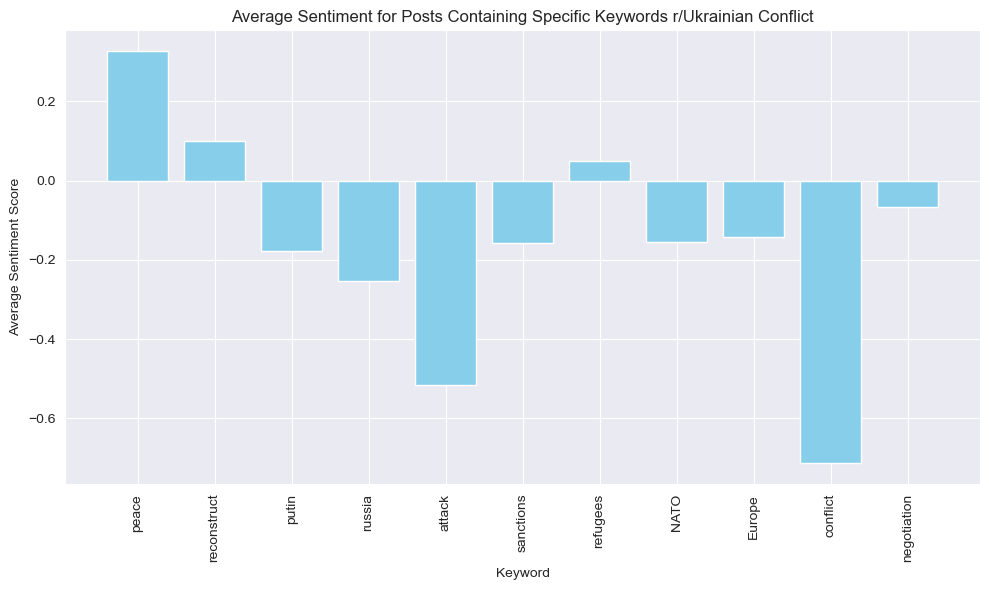

In [971]:
plt.figure(figsize=(10, 6))
plt.bar(keyword_sentiment_df_ukr_conflict_clean["Keyword"], keyword_sentiment_df_ukr_conflict_clean["Average Sentiment"], color="skyblue")
plt.title("Average Sentiment for Posts Containing Specific Keywords r/Ukrainian Conflict")
plt.xlabel("Keyword")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

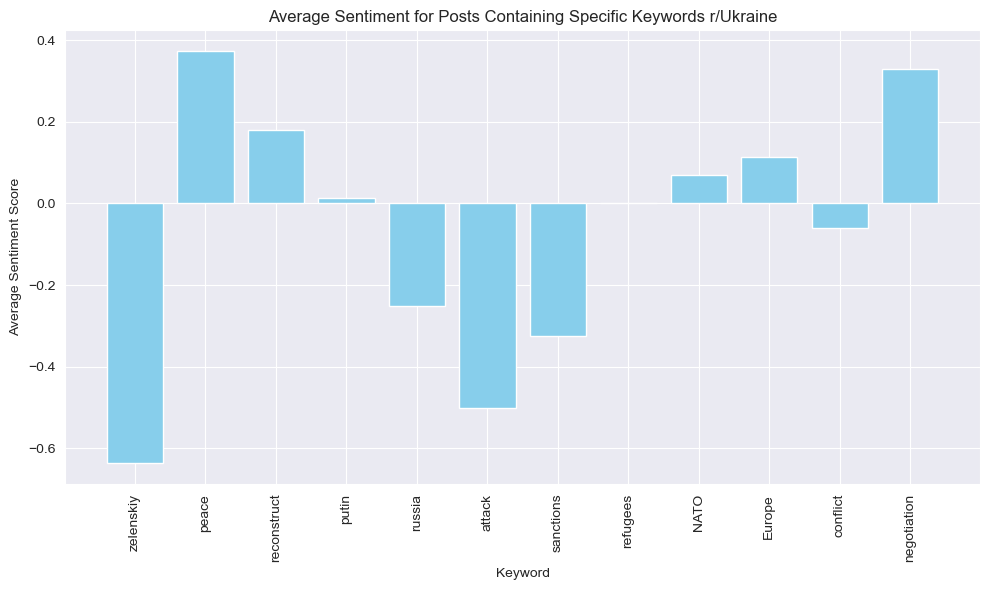

In [972]:
plt.figure(figsize=(10, 6))
plt.bar(keyword_sentiment_df_ua_clean["Keyword"], keyword_sentiment_df_ua_clean["Average Sentiment"], color="skyblue")
plt.title("Average Sentiment for Posts Containing Specific Keywords r/Ukraine")
plt.xlabel("Keyword")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Results interpretation:

I initially expected the word "Zelenskiy" to carry a positive sentiment, reflecting widespread support and positive perceptions. However, the analysis revealed the opposite—"Zelenskiy" is associated with negative sentiment in the discussions. This unexpected result might suggest a more complex or critical discourse surrounding the figure, possibly influenced by recent events or varying opinions within the community.

As anticipated, words like "russia," "attack,", "sanctions" and "sanctions" consistently carry negative sentiment, aligning with their association with aggression and conflict. On the other hand, "peace" and "reconstruct" maintains a positive sentiment, as expected, reflecting a universal aspiration.

What stands out is the divergent sentiment associated with the word "putin." While it is viewed negatively in one subreddit, it carries a slightly positve, almost neutral sentiment in another. Similarly, terms like "NATO," "Europe," and "negotiation" also show varying sentiment across different subreddits, indicating differing perspectives on these topics within different communities. These variations highlight the nuanced and multifaceted nature of online discussions, where context and community-specific dynamics significantly influence sentiment.

## Keyword analysis r/Geopolitics

In [973]:
# Creating binary columns for keyword presence for r/Ukraine
for keyword in positive_keywords + negative_keywords + neutral_keywords:
    df_geopolit[keyword] = df_geopolit["title"].str.contains(keyword, case=False, na=False).astype(int)
    
# Calculating average sentiment for posts containing each keyword
keyword_sentiment = {}
for keyword in positive_keywords + negative_keywords + neutral_keywords:
    keyword_sentiment[keyword] = df_geopolit[df_ua[keyword] == 1]["compound"].mean()

# Convert the results to a DataFrame for easier analysis/visualization
keyword_sentiment_df_geopolit = pd.DataFrame(keyword_sentiment.items(), columns=["Keyword", "Average Sentiment"])

keyword_sentiment_df_geopolit_clean = keyword_sentiment_df_geopolit.dropna()
keyword_sentiment_df_geopolit_clean

/var/folders/x9/4vdx7j915qg5pvqlbqynp2dr0000gn/T/ipykernel_4627/834059910.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  keyword_sentiment[keyword] = df_geopolit[df_ua[keyword] == 1]["compound"].mean()
/var/folders/x9/4vdx7j915qg5pvqlbqynp2dr0000gn/T/ipykernel_4627/834059910.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  keyword_sentiment[keyword] = df_geopolit[df_ua[keyword] == 1]["compound"].mean()
/var/folders/x9/4vdx7j915qg5pvqlbqynp2dr0000gn/T/ipykernel_4627/834059910.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  keyword_sentiment[keyword] = df_geopolit[df_ua[keyword] == 1]["compound"].mean()
/var/folders/x9/4vdx7j915qg5pvqlbqynp2dr0000gn/T/ipykernel_4627/834059910.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  keyword_sentiment[keyword] = df_geopolit[df_ua[keyword] == 1]["compound"].mean()
/var/folders/x9/4vdx7j915qg5pvqlbqynp2dr0000

,Keyword,Average Sentiment
3,peace,-0.178217
4,reconstruct,-0.151700
5,putin,-0.182886
6,russia,-0.065709
7,attack,-0.178126
9,sanctions,0.073850
10,refugees,0.000000
11,NATO,-0.129475
12,Europe,0.009920
13,conflict,-0.458067


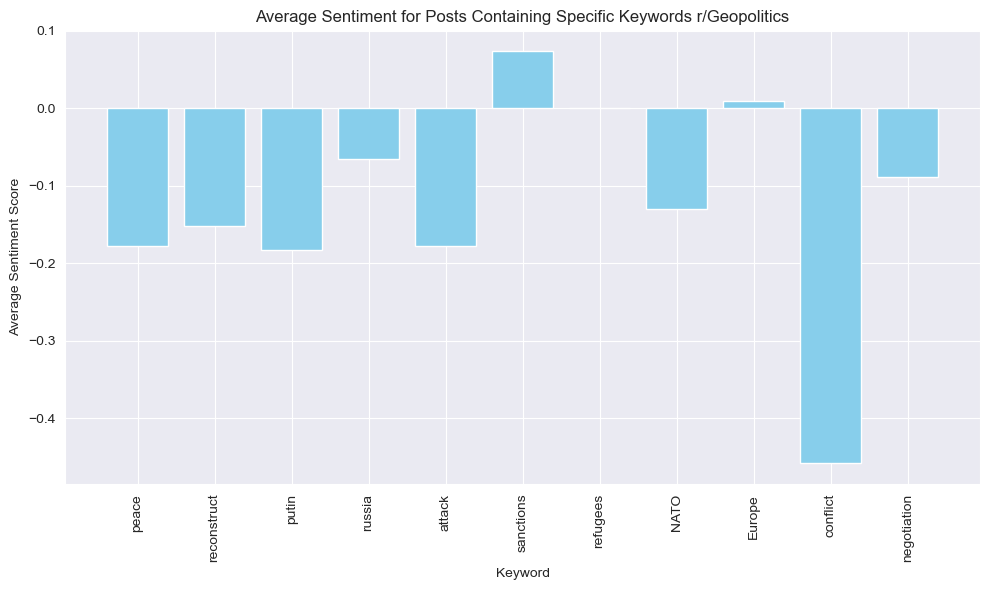

In [974]:
plt.figure(figsize=(10, 6))
plt.bar(keyword_sentiment_df_geopolit_clean["Keyword"],
        keyword_sentiment_df_geopolit_clean["Average Sentiment"], color="skyblue")
plt.title("Average Sentiment for Posts Containing Specific Keywords r/Geopolitics")
plt.xlabel("Keyword")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Results interpretation:

Additionally I decided to look at the key words analysis of the subreddit r/Geopolitics and here are my findings:

Word  "reconstruction," has a neutral sentiment. This suggests that people in this subreddit discuss these topics with a balanced view, possibly reflecting different opinions on international relations and diplomacy.
The words "peace" and "refugees" are viewed positively, which aligns with the community’s hopeful outlook on conflict resolution and concern for humanitarian issues.
Words like "reconstruct," "Putin," "Russia," "attack," "NATO," "conflict," and "negotiation" are seen negatively. This indicates criticism or concern about these topics, especially in the context of geopolitical conflicts.


Putting all the analysis of all subreddits together, we can conclude that across all subreddits,  "Russia," "attack,", "conflict" and "sanctions" consistently have negative sentiment, reflecting their association with conflict. "Peace" is viewed positively in the Ukrainian subreddits, because it represents the hope for an end to the conflict, but negative in r/Geopolitics showing skepticism about its feasibility or the effectiveness of diplomatic efforts. Same with the word "reconstruct".
"Zelenskiy": In the Ukrainian subreddits, "Zelenskiy" surprisingly has a negative sentiment, which is different from what we might expect. This critical view contrasts with the more neutral or positive expectations.
The divergent sentiment surrounding "Putin" and other terms like "NATO," "Europe," and "negotiation" across different subreddits indicates that the same topics can evoke different emotions depending on the community and context. These variations emphasize the nuanced and multifaceted nature of online discussions, where sentiment is shaped by a complex interplay of factors including community focus, current events, and the broader geopolitical landscape.